<a href="https://colab.research.google.com/github/ars200200/numerical-methods-3-sem/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy._typing import NDArray
import matplotlib as mpl

from typing import Optional
from IPython.display import clear_output
from tqdm import tqdm
sns.set_style('darkgrid')

In [ ]:
class Solution:




    hx = 1e-2
    hy = 1e-2

    lx = round(np.pi / hx)
    ly = round(np.pi / hy)


    x_arr, h_step_x = np.linspace(0, np.pi, lx, retstep=True) #Returns numpy NDArray and float
    y_arr, h_step_y = np.linspace(0, np.pi, ly, retstep=True)
    x_arr, y_arr = np.meshgrid(x_arr, y_arr, indexing='ij')


    @classmethod
    def apply_operator(cls, old_array: NDArray[float],
                        hx: Optional[float] = None,
                        hy: Optional[float] = None) -> NDArray:


        """
        Функция применяет оператор к предыдущему приближению задачи.

        Эта функция принимает на вход двумерный массив numpy и два необязательных параметра hx, hy,
        которые представляют собой шаги по осям x и y соответственно.
        Функция возвращает новый двумерный массив numpy, который представляет собой результат
        применения оператора к исходному массиву.

        :param old_array: Двумерный массив numpy, представляющий последнее приближение задачи.
        :type old_array: 'numpy.ndarray[float]'

        :param hx: Шаг по оси x. По умолчанию равен h_step_x.
        :type hx: Optional[float]

        :param hy: Шаг по оси y. По умолчанию равен h_step_y.
        :type hy: Optional[float]

        :return: Новый двумерный массив numpy, представляющий результат применения оператора к исходному массиву.
        :rtype: 'numpy.ndarray'
        """

        hx = hx or Solution.h_step_x
        hy = hy or Solution.h_step_y

        new_array = np.zeros_like(old_array)

        new_array[+1:, :] += (old_array[+1:, :] - old_array[:-1, :]) / hx ** 2
        new_array[:-1, :] += (old_array[:-1, :] - old_array[+1:, :]) / hx ** 2
        new_array[:, +1:] += (old_array[:, +1:] - old_array[:, :-1]) / hy ** 2
        new_array[:, :-1] += (old_array[:, :-1] - old_array[:, +1:]) / hy ** 2
        new_array[+0,  :] += (old_array[+0,  :] - old_array[-1,  :]) / hx ** 2
        new_array[-1,  :] += (old_array[-1,  :] - old_array[+0,  :]) / hx ** 2
        new_array[:,  +0] += (old_array[:,  +0] - old_array[:,  -1]) / hy ** 2
        new_array[:,  -1] += (old_array[:,  -1] - old_array[:,   0]) / hy ** 2

        new_array += old_array

        return new_array


    @staticmethod
    def right_part(X_array: NDArray[float],
                    Y_array: NDArray[float]):

        """
        Функция вычисляет правую часть дифференциального уравнения для заданных массивов X и Y.

        Эта функция принимает два массива numpy с вещественными числами (X_array, Y_array)
        и возвращает новый массив numpy, где каждое значение является результатом вычисления
        правой части дифференциального уравнения для соответствующих значений X и Y.

        Параметры:
            X_array: 'numpy.ndarray[float]' - массив значений X.
            Y_array: 'numpy.ndarray[float]' - массив значений Y.

        Возвращает:
            'numpy.ndarray[float]' : результат вычисления правой части дифференциального уравнения для каждого элемента входных массивов.

        """

        return np.sin(2 * X_array) * np.exp( -np.cos(2 * Y_array)) * (2 * np.cos(2 * Y_array) - 1) ** 2


    @staticmethod
    def GMRES_method(last_approx: NDArray[float], r_part: NDArray[float],
                      epochs: int=100000, epoch_to_draw: int=1000,
                      draw=True) -> NDArray[float]:

        """
        Функция реализует метод GMRES (Generalized Minimal Residual Algorithm) для решения систем линейных уравнений.

        Метод GMRES - это итерационный метод решения систем линейных алгебраических уравнений,
        основанный на минимизации нормы невязки в текущем приближении.

        Параметры:
            start: NDArray[float] - начальное приближение к решению.
            right_part: NDArray[float] - правая часть системы линейных уравнений.
            epochs: int (по умолчанию 100000) - количество итераций для выполнения метода ГМРЭС.
            draw: bool (по умолчанию True) - флаг, указывающий на необходимость визуализации процесса сходимости.

        Возвращает:
            NDArray[float] - решение системы линейных уравнений.
        """

        r = Solution.apply_operator(last_approx) - r_part
        loss = []
        #fig, ax = plt.subplots(1, 2)


        for i in tqdm(range(epochs)):
            loss.append(np.linalg.norm(r))
            Ar = Solution.apply_operator(r)
            tau = np.sum(Ar * r) / np.sum(Ar * Ar)
            last_approx -= r* tau
            r -= tau * Solution.apply_operator(r)

            if draw and i % epoch_to_draw == 0:
                clear_output(wait=True)
                plt.plot(loss)
                plt.show()
        new_approx = last_approx - last_approx.mean()
        return new_approx


    @staticmethod
    def exact_solution(X_arr: NDArray[float], Y_arr: NDArray[float]) -> NDArray[float]:
        """
        Вычисляет точное решение для заданных массивов X и Y.

        Эта функция принимает два массива numpy (X и Y) в качестве входных данных,
        вычисляет их с использованием формулы np.sin(2 * X_arr) * np.exp(-np.cos(2 * Y_arr))
        и возвращает результат как массив numpy.

        Параметры:
            X_arr: NDArray[np.float] - Массив значений X
            Y_arr: NDArray[np.float] - Массив значений Y

        Возвращаемое значение:
            NDArray[np.float]: Результат вычисления точного решения для заданных массивов X и Y.
        """

        return  np.sin(2 * X_arr) * np.exp(- np.cos(2 * Y_arr))



    @staticmethod
    def draw_results(numerical: NDArray, real_solution:NDArray) -> None:
        """
        Функция для визуализации и сравнения численного решения с реальным решением.

        Эта функция создает три графика. Первый график отображает реальное решение,
        второй - численное решение, а третий показывает разницу между этими двумя решениями.

        Параметры:
            numerical: NDArray
                Численное решение задачи.

            real_solution: NDArray
                Реальное (точное) решение задачи.

        Возвращает:
            float
                Среднее значение абсолютной разницы между численным и реальным решением.
        """
        mpl.rcParams['axes.grid'] = False
        fig, ax = plt.subplots(1, 2, figsize=[10,8])

        ax[0].imshow(real_solution)
        ax[1].imshow(numerical)

        ax[0].set_title('Exact solution')
        ax[1].set_title('Numerical solution')
        return None


    @staticmethod
    def draw_diff(numerical: NDArray, real_solution:NDArray) -> float:
        """
        Функция для визуализации и расчета среднего отклонения между численным решением и реальным.

        Эта функция принимает два массива numpy - численное решение задачи и ее реальное решение.
        Затем она вычисляет абсолютную разницу между этими двумя решениями, визуализирует эту разницу с помощью тепловой карты seaborn,
        и возвращает среднее значение этой разницы.

        Параметры:
            numerical (NDArray): Численное решение задачи.
            real_solution (NDArray): Реальное решение задачи.

        Возвращаемое значение:
            float: Среднее отклонение между численным решением и реальным.
        """
        diff = np.abs(numerical - real_solution)
        plt.axis('off')
        sns.heatmap(diff)
        return diff.mean()



    def main(self):
        """
        Главная функция класса. Выполняет все необходимые вычисления для решения задачи.

        Действия:
            1. Вызывает метод right_part() для получения правой части уравнения.
            2. Инициализирует начальное приближение с помощью функции sin().
            3. Применяет GMRES_method для нахождения решения, используя начальное приближение и правую часть уравнения.
            4. Вычисляет точное решение задачи с помощью метода exact_solution().

        :return: None
        """

        r_part = Solution.right_part(Solution.x_arr, Solution.y_arr)
        start = np.sin(Solution.x_arr)
        self.result = Solution.GMRES_method(start, r_part, epochs=50000)
        self.real_solution = Solution.exact_solution(Solution.x_arr, Solution.y_arr)


In [ ]:
sol = Solution()

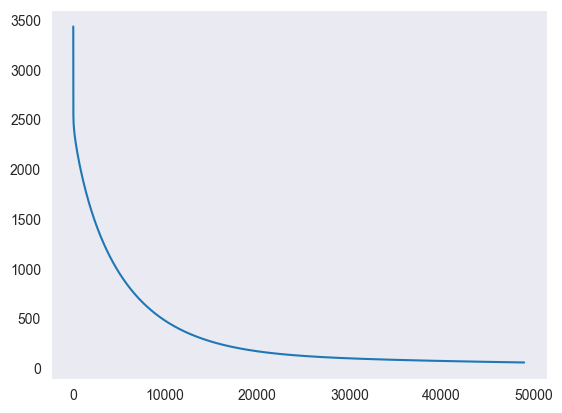

100%|██████████| 50000/50000 [03:02<00:00, 273.52it/s]


In [ ]:
sol.main()

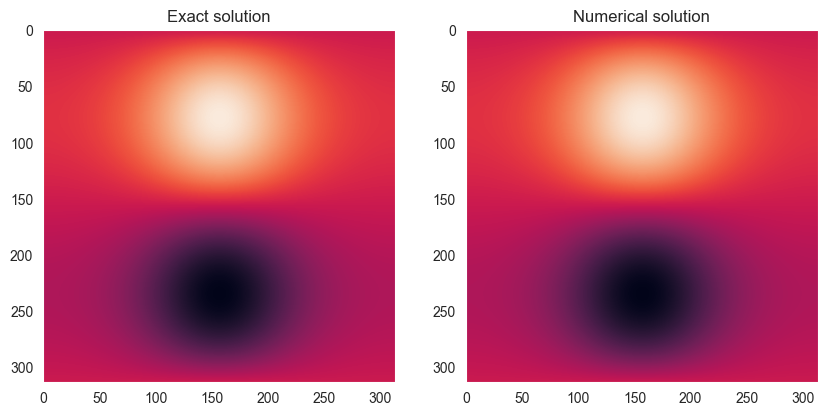

In [ ]:
sol.draw_results(sol.result, sol.real_solution)

Средний модуль разницы составляет 0.003761859481313625


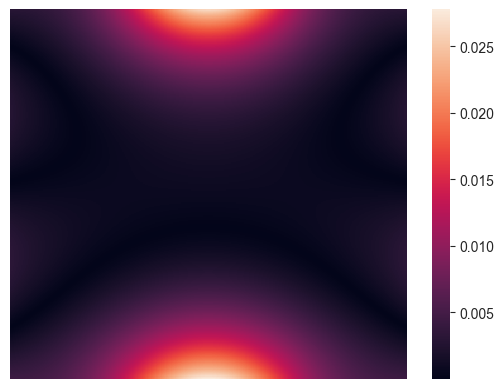

In [ ]:
print('Средний модуль разницы составляет', sol.draw_diff(sol.result, sol.real_solution))